# CNN for Chromagram only

## 1 - All 10

In [2]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
FILE_PATH = os.path.join('Data', 'chromagrams', 'chromagram_12')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


Processing genre: blues
Processing genre: classical
Processing genre: country
Processing genre: disco
Processing genre: hiphop
Processing genre: jazz
Processing genre: metal
Processing genre: pop
Processing genre: reggae
Processing genre: rock
Train set: 800 samples
Test set: 200 samples


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.0969 - loss: 2.5299 - val_accuracy: 0.0750 - val_loss: 2.3263 - learning_rate: 1.0000e-04
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.0740 - loss: 2.4057 - val_accuracy: 0.0650 - val_loss: 2.3124 - learning_rate: 1.0000e-04
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 270ms/step - accuracy: 0.0907 - loss: 2.3260 - val_accuracy: 0.0750 - val_loss: 2.3095 - learning_rate: 1.0000e-04
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 288ms/step - accuracy: 0.1164 - loss: 2.3113 - val_accuracy: 0.0650 - val_loss: 2.3035 - learning_rate: 1.0000e-04
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 261ms/step - accuracy: 0.1200 - loss: 2.2998 - val_accuracy: 0.0700 - val_loss: 2.3061 - learning_rate: 1.0000e-04
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.0917 - loss: 2.3100 - val_accuracy: 0.1050 - val_loss: 2.3030 - learning_rate: 1.0000e-04
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accurac

## Apply the confusion matrix after the model

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


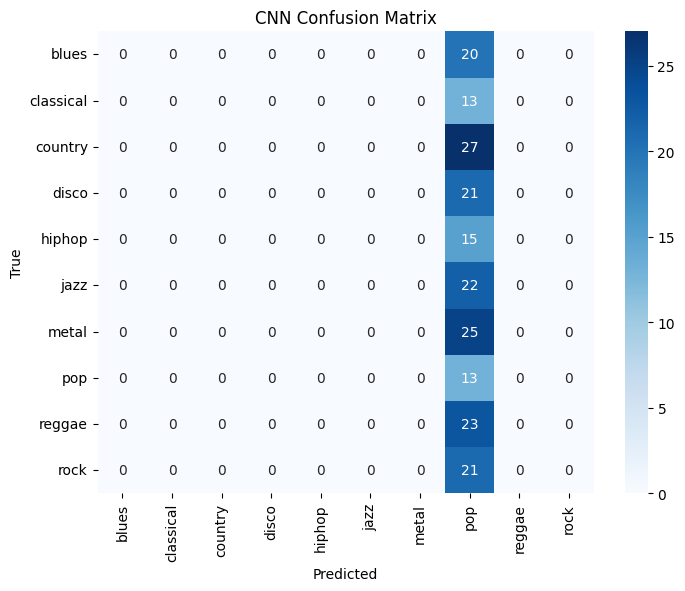

In [3]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 2 - Limited Genres Easy (metal and classical)

In [4]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['classical', 'metal']
FILE_PATH = os.path.join('Data', 'chromagrams', 'chromagram_12')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


Processing genre: classical
Processing genre: metal
Train set: 160 samples
Test set: 40 samples


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.2608 - loss: 1.7812 - val_accuracy: 0.5250 - val_loss: 0.7262 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.5343 - loss: 1.0690 - val_accuracy: 0.4750 - val_loss: 0.7515 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.4437 - loss: 1.1460 - val_accuracy: 0.5250 - val_loss: 0.6929 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - accuracy: 0.4233 - loss: 1.3310 - val_accuracy: 0.6750 - val_loss: 0.7005 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.4762 - loss: 1.0545 - val_accuracy: 0.5250 - val_loss: 0.7120 - learning_rate: 1.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 298ms/step - accuracy: 0.4110 - loss: 1.1116 - val_accuracy: 0.6750 - val_loss: 0.7428 - learning_rate: 1.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.4583 - loss:

## Confusion Matrix Easy (classical and metal)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


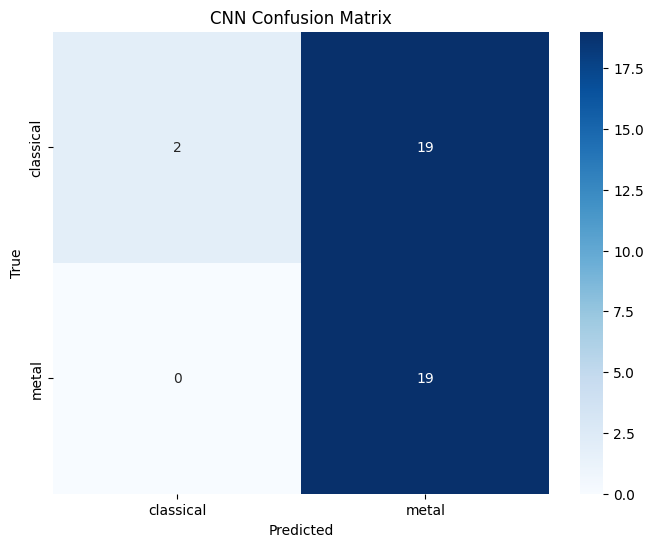

In [5]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 3 - Limited genres Hard (disco and pop)

In [6]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

# Define the genres and file paths
GENRES = ['disco', 'pop']
FILE_PATH = os.path.join('Data', 'chromagrams', 'chromagram_12')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")

Processing genre: disco
Processing genre: pop
Train set: 160 samples
Test set: 40 samples
Epoch 1/20


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.3882 - loss: 1.5773 - val_accuracy: 0.4750 - val_loss: 0.7477 - learning_rate: 1.0000e-04
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.5155 - loss: 1.1924 - val_accuracy: 0.5250 - val_loss: 0.7627 - learning_rate: 1.0000e-04
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 267ms/step - accuracy: 0.4023 - loss: 1.4256 - val_accuracy: 0.5250 - val_loss: 0.7319 - learning_rate: 1.0000e-04
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.5408 - loss: 1.0960 - val_accuracy: 0.6000 - val_loss: 0.6931 - learning_rate: 1.0000e-04
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.5230 - loss: 1.1351 - val_accuracy: 0.5000 - val_loss: 0.7002 - learning_rate: 1.0000e-04
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 322ms/step - accuracy: 0.5539 - loss: 0.9147 - val_accuracy: 0.5000 - val_loss: 0.7030 - learning_rate: 1.0000e-04
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 293ms/step - accuracy: 0.5174 - loss: 0.9118 - v

## 12 - Confusion Matrix Hard (disco and pop)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/stepWARNING:tensorflow:6 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x3aaf84940> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


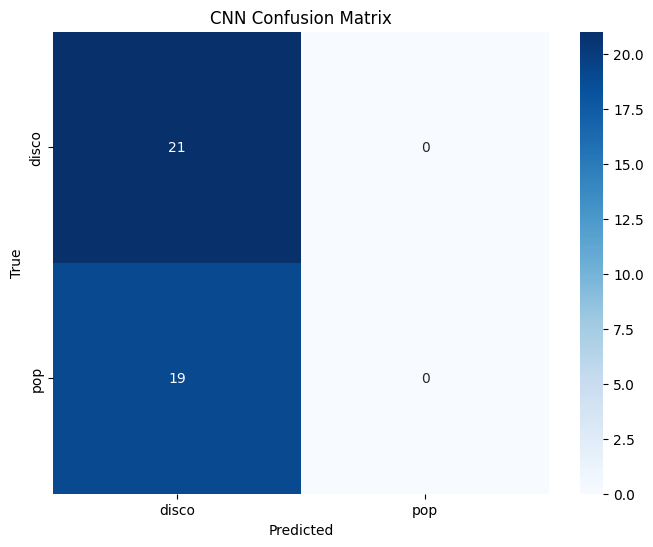

In [7]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## 13 - Limited Genres Medium (5 random)

In [8]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import random

# Augmentation function
def augment_image(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, 0.8, 1.2)
    return image

GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
GENRES = random.sample(GENRES, 5)
print(GENRES)
FILE_PATH = os.path.join('Data', 'chromagrams', 'chromagram_12')

GENRE_TO_INDEX = {genre: index for index, genre in enumerate(GENRES)}

# Organize data by song ID
song_to_clips = {}

for genre in GENRES:
    genre_dir = os.path.join(FILE_PATH, genre)
    print(f"Processing genre: {genre}")
    for file in os.listdir(genre_dir):
        if not file.endswith(".png"):
            continue
        
        song_id = file.split("_clip_")[0]  # Extract song ID (e.g., "blues.00042")

        if song_id not in song_to_clips:
            song_to_clips[song_id] = []

        image = tf.io.read_file(os.path.join(genre_dir, file))
        image = tf.image.decode_png(image, channels=1)
        image = tf.image.convert_image_dtype(image, tf.float32)
        image = tf.image.resize(image, [36, 256])  # Resize to 256x256
        image = augment_image(image)  # Apply augmentation
        image = image.numpy()  # Convert to numpy array
        
        song_to_clips[song_id].append((image, GENRE_TO_INDEX[genre]))

# Convert dictionary to list format
song_ids = list(song_to_clips.keys())
train_ids, test_ids = train_test_split(song_ids, test_size=0.2, random_state=42)

X_train, y_train, X_test, y_test = [], [], [], []

# Assign clips based on the train-test split
for song_id in song_ids:
    clips = song_to_clips[song_id]
    if song_id in train_ids:
        for image, label in clips:
            X_train.append(image)
            y_train.append(label)
    else:
        for image, label in clips:
            X_test.append(image)
            y_test.append(label)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")

# Define the CNN model
model = models.Sequential([    
    Conv2D(36, (3, 3), activation='relu', input_shape=(36, 256, 1)),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(256, activation='relu'),
    Dropout(0.5),
    
    Dense(128, activation='relu'), 
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Learning rate adjustment
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, callbacks=[reduce_lr])

# Evaluate the model
evaluation = model.evaluate(X_test, y_test)
print(f"Test accuracy: {evaluation[1]:.3f}")


['reggae', 'country', 'blues', 'classical', 'metal']
Processing genre: reggae
Processing genre: country
Processing genre: blues
Processing genre: classical
Processing genre: metal
Train set: 400 samples
Test set: 100 samples


/Users/conorwoollatt/.pyenv/versions/3.9.6/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 285ms/step - accuracy: 0.1485 - loss: 2.1901 - val_accuracy: 0.1500 - val_loss: 1.9326 - learning_rate: 1.0000e-04
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.1975 - loss: 2.0556 - val_accuracy: 0.1400 - val_loss: 1.8337 - learning_rate: 1.0000e-04
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.2215 - loss: 1.9586 - val_accuracy: 0.1400 - val_loss: 1.8081 - learning_rate: 1.0000e-04
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.2218 - loss: 1.8423 - val_accuracy: 0.1400 - val_loss: 1.7773 - learning_rate: 1.0000e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 263ms/step - accuracy: 0.1979 - loss: 1.9078 - val_accuracy: 0.1400 - val_loss: 1.7416 - learning_rate: 1.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - accuracy: 0.1931 - loss: 1.8530 - val_accuracy: 0.1400 - val_loss: 1.7940 - learning_rate: 1.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 284ms/step - accuracy: 

## 14 - Confusion Matrix Medium (5 random)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


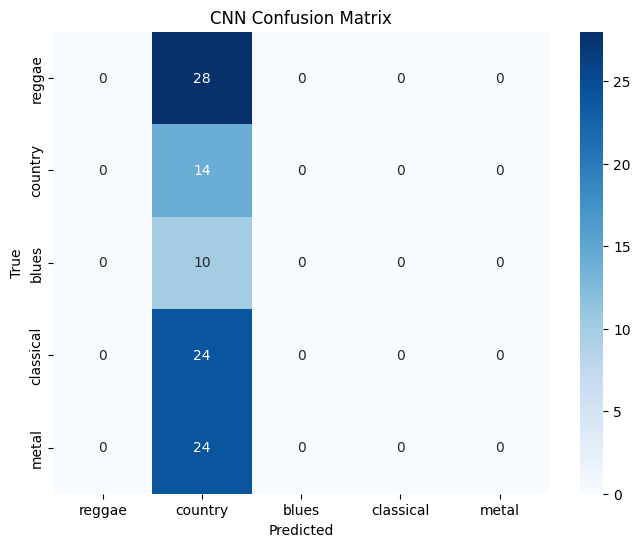

In [9]:
import seaborn as sns
# from sklearn.metrics import confusion
import numpy as NP
from sklearn.metrics import confusion_matrix

cnn_preds = np.argmax(model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt="d", cmap="Blues", xticklabels=GENRES, yticklabels=GENRES)
plt.title("CNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()